- Context

Webportals like Bhuvan get vast amount of feedback from the users. To go through all the feedback's can be a tedious job. You have to categorize opinions expressed in feedback forums. This can be utilized for feedback management system. We Classification of individual comments/reviews.and we also determining overall rating based on individual comments/reviews. So that company can get a complete idea on feedback's provided by customers and can take care on those particular fields. This makes more loyal Customers to the company, increase in business , fame ,brand value ,profits.

- Content

This file has reviewer ID , User ID, Reviewer Name, Reviewer text, helpful, Summary(obtained from Reviewer text),Overall Rating on a scale 5, Review time
Description of columns in the file:

reviewerID - ID of the reviewer, e.g. A2SUAM1J3GNN3B

asin - ID of the product, e.g. 0000013714

reviewerName - name of the reviewer

helpful - helpfulness rating of the review, e.g. 2/3

reviewText - text of the review

overall - rating of the product

summary - summary of the review

unixReviewTime - time of the review (unix time)

reviewTime - time of the review (raw)

- Task

You have to perform Sentimental Analysis for this data. Help the organization to understand better about their customer feedback's So that they can concentrate on those issues customer's are facing. Build the model which has highest accuracy in classifying the feedback as positive,Negative and neutral.

Task :1

You have to categorize opinions expressed in feedback forums

Task :2

You have to classify individual comments/reviews and you have to determine overall rating based on individual
comments/reviews.

https://www.kaggle.com/meisamraz/f1-score-99-sentiment-analysis-handling-imbalance/notebook

https://www.kaggle.com/madz2000/sentiment-analysis-89-accuracy

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('Datasets/Musical_instruments_reviews.csv')
data.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"


In [3]:
data.shape

(10261, 9)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10261 entries, 0 to 10260
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviewerID      10261 non-null  object 
 1   asin            10261 non-null  object 
 2   reviewerName    10234 non-null  object 
 3   helpful         10261 non-null  object 
 4   reviewText      10254 non-null  object 
 5   overall         10261 non-null  float64
 6   summary         10261 non-null  object 
 7   unixReviewTime  10261 non-null  int64  
 8   reviewTime      10261 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 721.6+ KB


In [5]:
data.isnull().sum()

reviewerID         0
asin               0
reviewerName      27
helpful            0
reviewText         7
overall            0
summary            0
unixReviewTime     0
reviewTime         0
dtype: int64

> ## EDA

<AxesSubplot:title={'center':'Highest product reviews'}, xlabel='asin', ylabel='count'>

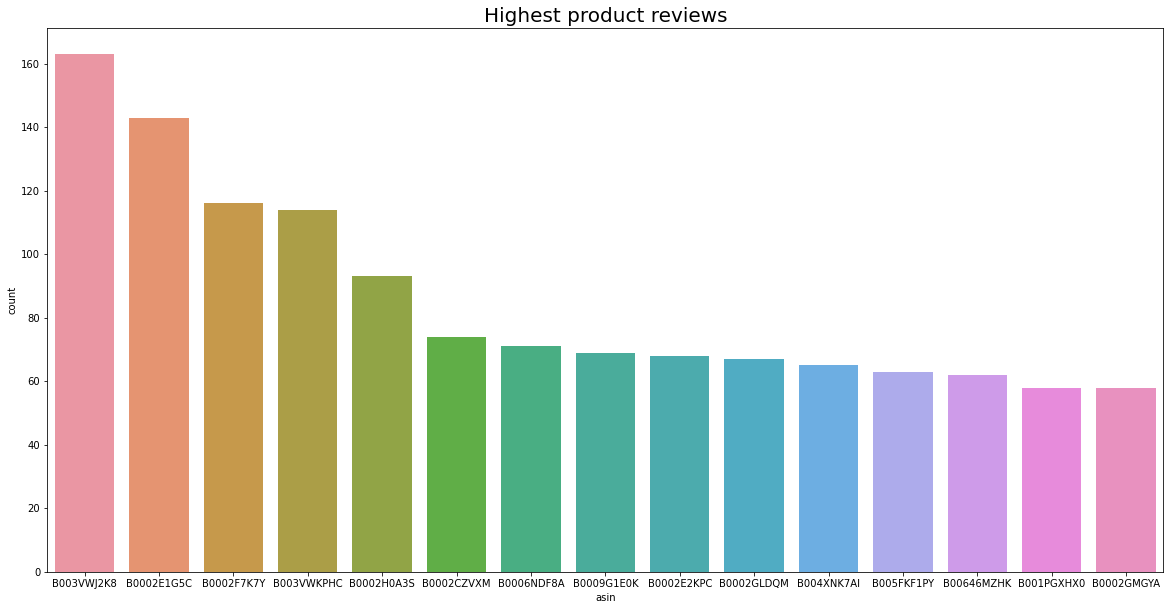

In [6]:
plt.figure(figsize=(20,10))
plt.title('Highest product reviews',size=20)
sns.countplot(x='asin',data=data,order=data['asin'].value_counts().index[0:15])

<AxesSubplot:title={'center':'Highest rating product review'}, xlabel='asin', ylabel='count'>

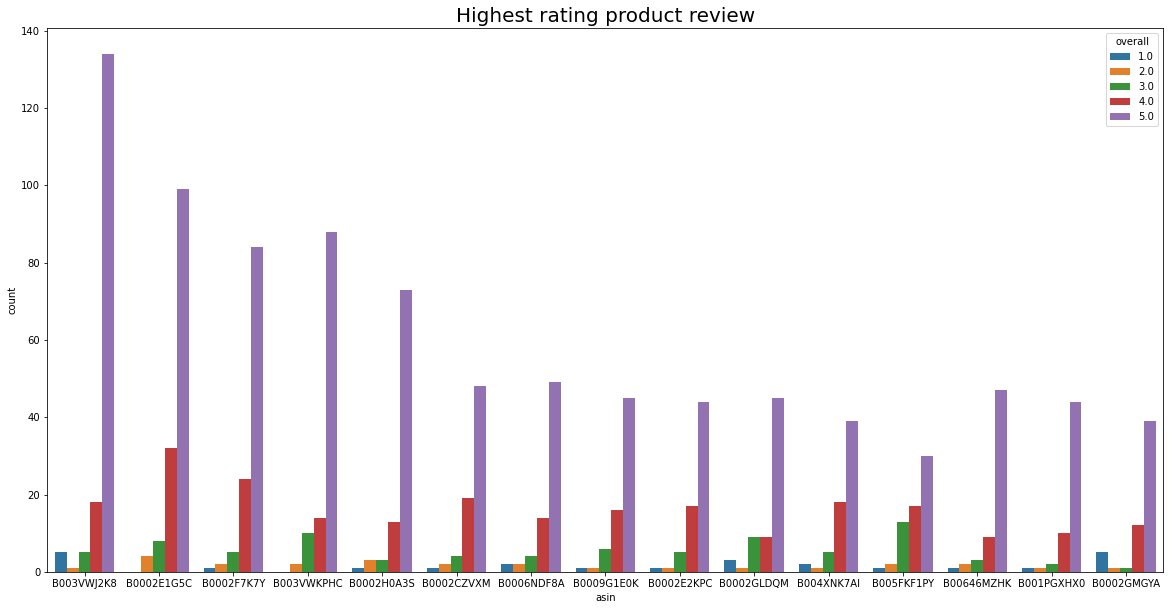

In [7]:
plt.figure(figsize=(20,10))
plt.title('Highest rating product review',size=20)
sns.countplot(x='asin',data=data,order=data['asin'].value_counts().index[0:15],hue=data['overall'])

<AxesSubplot:title={'center':'Highest rating '}, xlabel='overall', ylabel='count'>

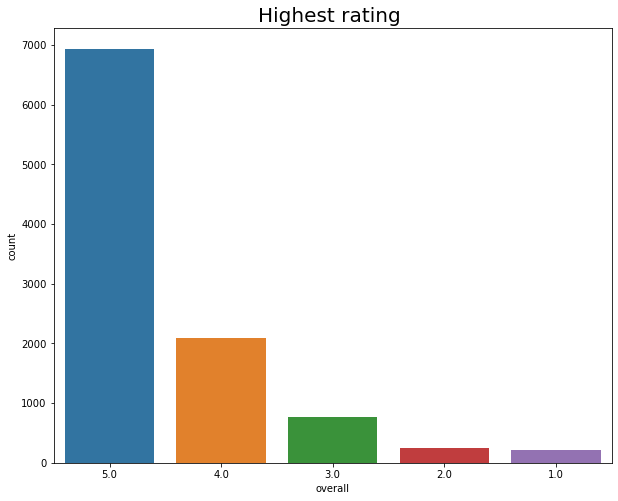

In [8]:
plt.figure(figsize=(10,8))
plt.title('Highest rating ',size=20)
sns.countplot(x='overall',data=data,order=data['overall'].value_counts().index[0:])

In [9]:
data.reviewText.fillna('',inplace=True)

> ### select needy features

In [10]:
df=pd.DataFrame(data,columns=['reviewText','summary','overall'])
df.head()

,reviewText,summary,overall
0,"Not much to write about here, but it does exac...",good,5.0
1,The product does exactly as it should and is q...,Jake,5.0
2,The primary job of this device is to block the...,It Does The Job Well,5.0
3,Nice windscreen protects my MXL mic and preven...,GOOD WINDSCREEN FOR THE MONEY,5.0
4,This pop filter is great. It looks and perform...,No more pops when I record my vocals.,5.0


In [11]:
## combine reviewtext and summary cols

df['text']=df['reviewText']+' '+df['summary']
df['text'][0]

"Not much to write about here, but it does exactly what it's supposed to. filters out the pop sounds. now my recordings are much more crisp. it is one of the lowest prices pop filters on amazon so might as well buy it, they honestly work the same despite their pricing, good"

In [12]:
df['rating']=df['overall']

del df['reviewText']
del df['summary']
del df['overall']

df.head()

,text,rating
0,"Not much to write about here, but it does exac...",5.0
1,The product does exactly as it should and is q...,5.0
2,The primary job of this device is to block the...,5.0
3,Nice windscreen protects my MXL mic and preven...,5.0
4,This pop filter is great. It looks and perform...,5.0


In [13]:
df.rating.value_counts()

5.0    6938
4.0    2084
3.0     772
2.0     250
1.0     217
Name: rating, dtype: int64

> ## sentiment analysis
- convert ratings 3,4,5 into 1 as positive reviews and 2,1 into 0 as negative reviews

In [14]:
def ratings(rating):
    if rating<3:
        return 0
    else:
        return 1
df['ratings']=df['rating'].apply(ratings)
df=df.drop(['rating'],axis=1)
df.head()

,text,ratings
0,"Not much to write about here, but it does exac...",1
1,The product does exactly as it should and is q...,1
2,The primary job of this device is to block the...,1
3,Nice windscreen protects my MXL mic and preven...,1
4,This pop filter is great. It looks and perform...,1


- Most words used in positive reviews using wordcloud

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
import nltk
import string
import collections
from collections import Counter
from nltk.corpus import stopwords

In [20]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/sasikala/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/sasikala/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

> Cleaning the text
- remove stopwords
- tokenization
- lemmatize
- lowercase
- tfidf

In [22]:
lemma=WordNetLemmatizer()
stop=set(stopwords.words('english'))
punctuation=list(string.punctuation)
stop.update(punctuation)


def lema_fun(text):
    new_text=[]
    for word in text.split():
        if word .lower() not in stop:
            lem=lemma.lemmatize(word)
            new_text.append(lem.lower())
    return ' '.join(new_text)

df.text=df.text.apply(lema_fun)

In [23]:
df.head()

,text,ratings
0,"much write here, exactly supposed to. filter p...",1
1,product exactly quite affordable.i realized do...,1
2,primary job device block breath would otherwis...,1
3,nice windscreen protects mxl mic prevents pops...,1
4,pop filter great. look performs like studio fi...,1


In [24]:
df.text.describe()

count                      10261
unique                     10256
top       good string five stars
freq                           3
Name: text, dtype: object

In [25]:
#split positive and negative reviews
positive=df[df['ratings']==1].text
Negative=df[df['ratings']==0].text

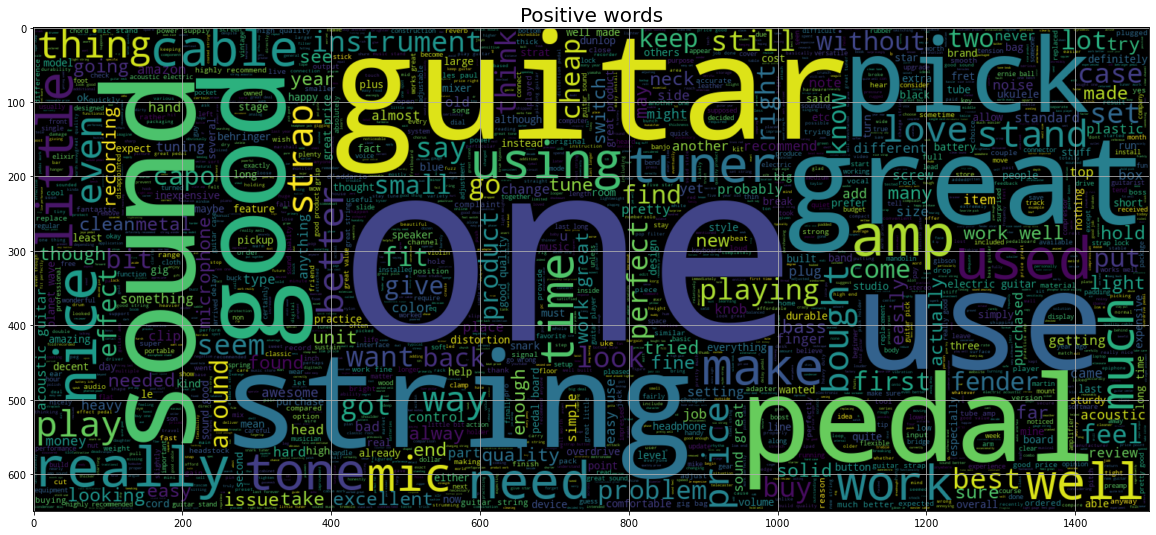

In [27]:
from wordcloud import WordCloud

plt.figure(figsize=(20,20))
plt.title('Positive words',size=20)

wordcloud_positive=WordCloud(min_font_size=3,max_words=2000,width=1500,height=650).generate(' '.join(positive))
plt.imshow(wordcloud_positive,interpolation='bilinear')
plt.grid(None)

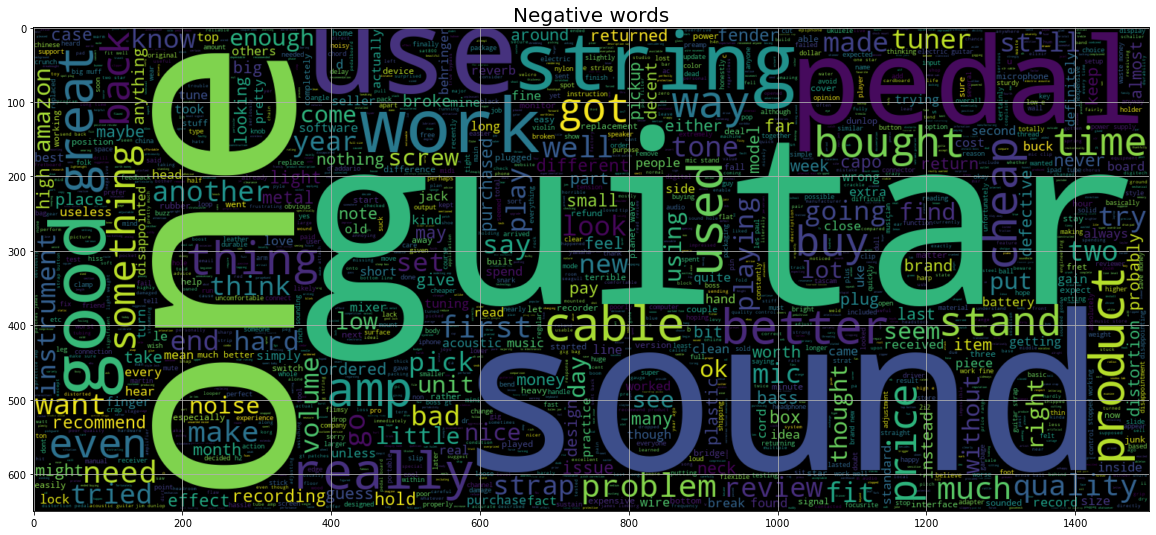

In [28]:
plt.figure(figsize=(20,20))
plt.title('Negative words',size=20)

wordcloud_positive=WordCloud(min_font_size=3,max_words=2000,width=1500,height=650).generate(' '.join(Negative))
plt.imshow(wordcloud_positive,interpolation='bilinear')
plt.grid(None)

> ### common word used in the reviews

<AxesSubplot:>

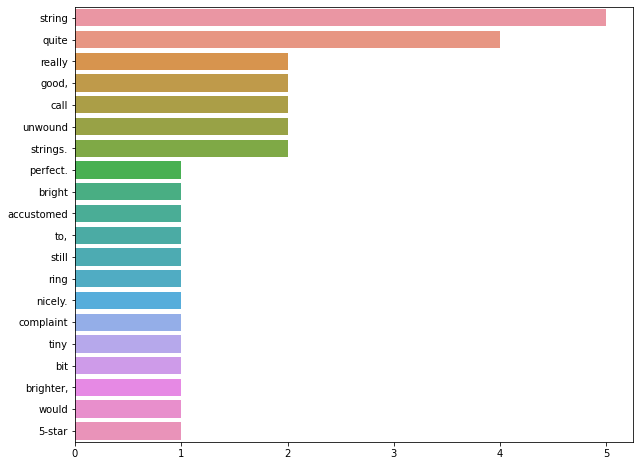

In [29]:
for i in df.text:
    global text
    text=i.split()
    
counts=Counter(text)
most_word=counts.most_common()

a,b=[], []
for word,count in most_word[:20]:
    if(word not in stop):
        a.append(word)
        b.append(count)
plt.figure(figsize=(10,8))
sns.barplot(x=b,y=a)